<a href="https://colab.research.google.com/github/wjdolan/DS_Portfolio/blob/main/Regression_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Challenge

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline



In [56]:
# importing recipes dataset
bikes = pd.read_csv("nyc-east-river-bicycle-counts.csv")
bikes.head()

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


In [62]:
bikes = bikes.loc[:, 'Date':'Total']

In [63]:
bikes

,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471
...,...,...,...,...,...,...,...,...,...,...
205,2016-04-26 00:00:00,2016-04-26 00:00:00,60.1,46.9,0.24,1997.0,3520,4559.0,2929.0,13005
206,2016-04-27 00:00:00,2016-04-27 00:00:00,62.1,46.9,0,3343.0,5606,6577.0,4388.0,19914
207,2016-04-28 00:00:00,2016-04-28 00:00:00,57.9,48.0,0,2486.0,4152,5336.0,3657.0,15631
208,2016-04-29 00:00:00,2016-04-29 00:00:00,57.0,46.9,0.05,2375.0,4178,5053.0,3348.0,14954


In [64]:
# checking data types to identify which variables are continuous, categorical and count
# note: my dependent variable, "Total" is an integer (count)

bikes.dtypes

Date                    object
Day                     object
High Temp (°F)         float64
Low Temp (°F)          float64
Precipitation           object
Brooklyn Bridge        float64
Manhattan Bridge         int64
Williamsburg Bridge    float64
Queensboro Bridge      float64
Total                    int64
dtype: object

In [65]:
# checking if there are any nans in the dataset

bikes.isnull().values.any()

False

In [66]:
# generating descriptive statistics summary

bikes['Total'].describe()

count      210.000000
mean     14534.500000
std       5569.173496
min       4335.000000
25%       9596.000000
50%      15292.500000
75%      18315.000000
max      23318.000000
Name: Total, dtype: float64

Skewness: -0.242981
Kurtosis: -0.907534


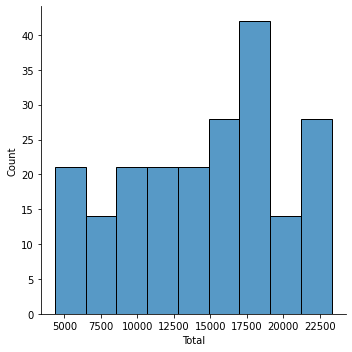

In [75]:
# checking the distribution to see if there are any outliers

sns.displot(bikes['Total'], kind='hist');

#skewness and kurtosis

print("Skewness: %f" % bikes['Total'].skew())
print("Kurtosis: %f" % bikes['Total'].kurt())

In [76]:
# creating a new column for average temperature by adding the highest and
#the lowest temperature and dividing it by 2

bikes['Average Temp'] = (bikes['High Temp (°F)'] + bikes['Low Temp (°F)'])/2

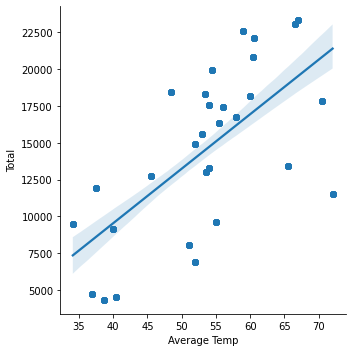

In [81]:
# plotting average temperature against total number of bikes 
# linear regression

sns.lmplot(x='Average Temp', y='Total', data=bikes);

In [83]:
# since I am predicting a count value, I should fit a poisson regression. 
import statsmodels.api as sm

X = bikes['Average Temp']
y = bikes['Total']

# add intercept to input variable
X = sm.add_constant(X)

# fit poisson regression model 
model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# add poisson fitted values to dataframe
bikes['reg_fit'] = model.fittedvalues

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


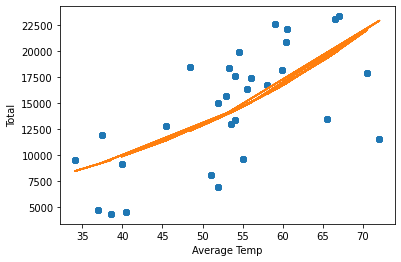

In [86]:
# plot & add a regression line

sns.regplot(x=bikes['Average Temp'], y=bikes['Total'], fit_reg=False)
plt.plot(bikes['Average Temp'], bikes['reg_fit']);